# Activation Functions

An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

A network may have three types of layers: input layers that take raw input from the domain, hidden layers that take input from another layer and pass output to another layer, and output layers that make a prediction.

All hidden layers typically use the same activation function. The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.

Activation functions are also typically differentiable, meaning the first-order derivative can be calculated for a given input value. This is required given that neural networks are typically trained using the backpropagation of error algorithm that requires the derivative of prediction error in order to update the weights of the model.

**Why Do We Need Activation Functions?**

Activation functions address two critical problems in Neural Networks:

1. Ensuring that activation maps are non-linear and, thus, independent of each other; and
2. Ensuring that some outputs have fundamental numerical properties, for example, being in the $[-1, 1]$ range or being a valid probability distribution.

There are several activation functions; we will, in this module, discuss only a few of them.

1. Sigmoid (Also called Logistic)
2. Hyperbolic Tangent (Tanh)
3. Rectified Linear Unit (ReLU)
4. Leaky ReLU
5. Parametric Leaky ReLU (PReLU)
6. Exponential Linear Units
7. Scaled Exponential Linear Unit
8. Linear
9. Softmax

## Sigmoid Activation Function

The Sigmoid function is defined as

\begin{equation}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}

The plot of the function and its derivatioin are shown below.

![Sigmoid](image11.png)

***

**Problems with Sigmoid activation function**

The main problems with the Sigmoid function are:

1. **Vanishing gradient**: looking at the function plot, you can see that when inputs become small or large, the function saturates at 0 or 1, with a derivative extremely close to 0. Thus it has almost no gradient to propagate back through the network, so there is almost nothing left for lower layers [2].
2. **Computationally expensive**: the function has an exponential operation.
3. **The output is not zero centered.**

***
### Plot of Sigmoid Activation Function

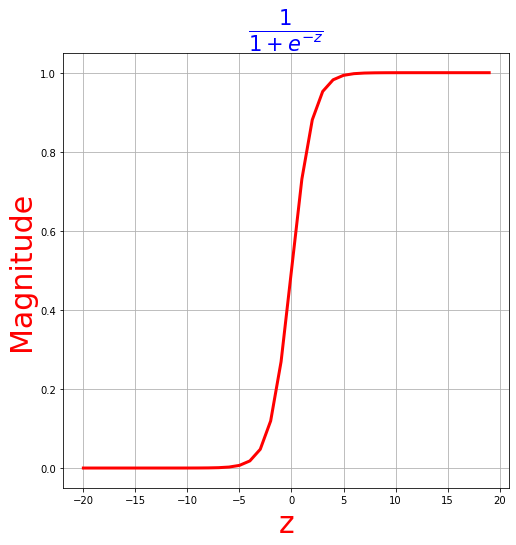

In [1]:
import tensorflow as tf
from tensorflow.keras.activations import sigmoid
import matplotlib.pyplot as plt

z = tf.range(-20, 20, dtype=tf.float32)
a = sigmoid(z.numpy())
plt.figure(figsize=(8,8))
plt.plot(z, a, linewidth = 3, color = 'red')
plt.title(r'$\frac{1}{1+e^{-z}}$',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')

***
### How to use it with TensorFlow 2

To use the Sigmoid activation function with TensorFlow 2, we can simply pass 'sigmoid' to the argument `activation`:
```
from tensorflow.keras.layers import Dense
Dense(10, activation='sigmoid')
```

**When using the Sigmoid function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range 0-1 (e.g. the range of the activation function) prior to training.**

***
## Hyperbolic Tangent Activation Functions

The Hyperbolic Tangent, also known as Tanh, is defined as:

\begin{equation}
\sigma(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
\end{equation}

***

The plot of the function and its derivative:

![Tanh](image12.png)

***
**Problems with Tanh activation function**

Since Tanh has characteristics similar to Sigmoid, it also faces the following two problems:

1. **Vanishing gradient**: looking at the function plot, you can see that when inputs become small or large, the function saturates at -1 or 1, with a derivative extremely close to 0. Thus it has almost no gradient to propagate back through the network, so there is almost nothing left for lower layers.
2. **Computationally expensive**: the function has an exponential operation.

***

### Plot of Tanh Activation Function

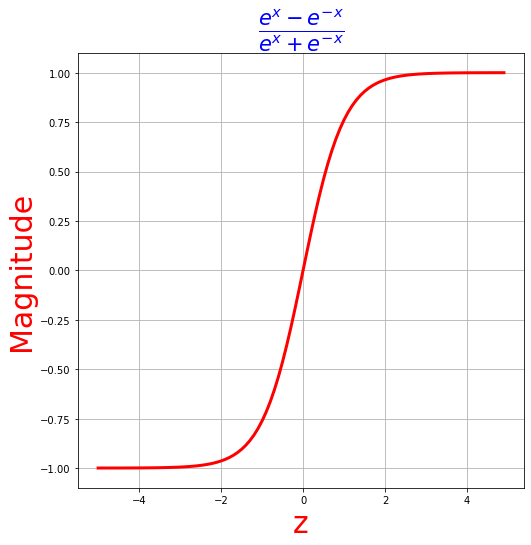

In [2]:
x = tf.range(-5, 5, delta=0.1, dtype=tf.float32)
a = tf.keras.activations.tanh(x.numpy())
plt.figure(figsize=(8,8))
plt.plot(x, a, linewidth = 3, color = 'red')
plt.title(r'$\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')

***
### How to use Tanh with TensorFlow 2
To use the Tanh, we can simply pass 'tanh' to the argument activation:
```
from tensorflow.keras.layers import Dense
Dense(10, activation='tanh')
```

## Rectified Linear Unit (ReLU)

The ReLU function is defined as

\begin{equation}
ReLU(x) = \max{\left(0, x\right)}
\end{equation}

or ReLU can also be defined as

\begin{equation}
ReLU(x) = \begin{cases} x & x> 0 \\
0 & x\leq 0
\end{cases}
\end{equation}


The plot of the function and its derivatioin are shown below.

![ReLU](image13.png)

***

**Problems with ReLU activation function**

Early neural networks were plagued by a problem known as the exploding/vanishing gradients. In sum, during backpropagation, gradients are multiplied with each other as you move back into the network, so large gradients with large gradients explode the signal while near-zero gradients with near-zero gradients vanish it. Using the ReLU activation, there are only two possible gradients: one, for the positive part, and zero, for the negative one. Therefore, concerning the role of activation functions on the problem, the rectifier effectively solves the exploding issue, which is arguably the worse, while creating the dead gradients problem; this is also called Dying ReLU.

**Dying ReLU**

During training, some neurons effectively die, meaning they stop outputting anything other than 0. In some cases, you may find that half of your network’s neurons are dead, especially if you used a large learning rate. A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputting 0s, and gradient descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative.

***
### Plot of ReLU Activation Function

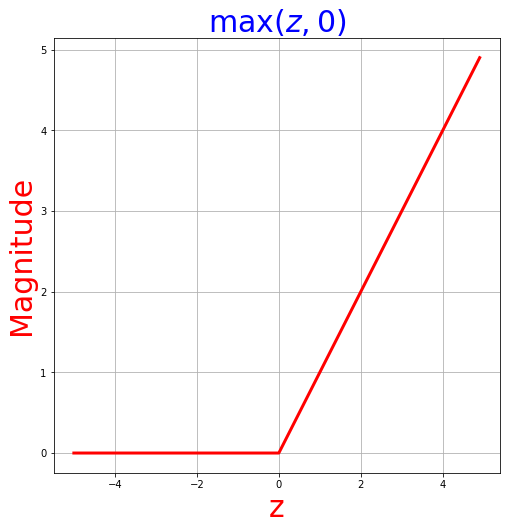

In [3]:
x = tf.range(-5, 5, delta=0.1, dtype=tf.float32)
a = tf.keras.activations.relu(x.numpy())
plt.figure(figsize=(8,8))
plt.plot(x, a, linewidth = 3, color = 'red')
plt.title(r'$\max{\left(z, 0\right)}$',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')




***
### How to use ReLU with TensorFlow 2
To use the ReLU, we can simply pass 'relu' to the argument activation:
```
from tensorflow.keras.layers import Dense
Dense(10, activation='relu')
```
or
```
from tensorflow.keras.layers import Dense
Dense(10, activation=tf.keras.activations.relu())
```

***
## Leaky Rectified Linear Unit (ReLU)

Leaky ReLU is an improvement over the ReLU activation function. It has all properties of ReLU, plus it will never have dying ReLU problem. Leaky ReLU is defined as:

\begin{equation}
ReLU(x) = \max{\left(x, \alpha x\right)}
\end{equation}

The hyperparameter $\alpha$ defines how much the function leaks. It is the slope of the function for $x < 0$ and is typically set to $0.01$. The small slope ensures that Leaky ReLU never dies.


The plot of the function and its derivatioin are shown below.

![LeakyReLU](image14.png)

***


***
### Plot of ReLU Activation Function

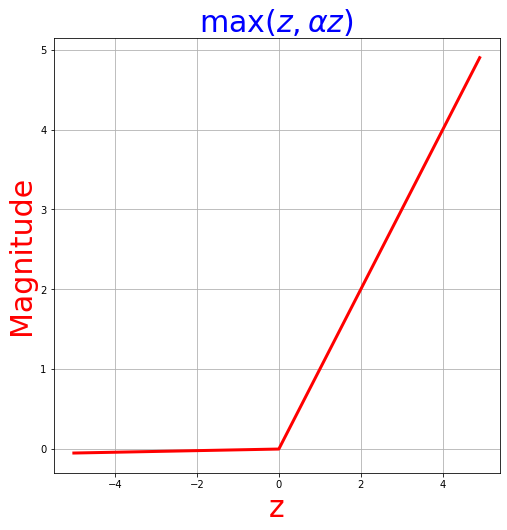

In [4]:
x = tf.range(-5, 5, delta=0.1, dtype=tf.float32)
a = tf.nn.leaky_relu(x, alpha=0.01)
plt.figure(figsize=(8,8))
plt.plot(x, a, linewidth = 3, color = 'red')
plt.title(r'$\max{\left(z, \alpha z\right)}$',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')

***
### How to use Leaky ReLU with TensorFlow 2
To use the ReLU, we can simply pass 'relu' to the argument activation:
```
from tensorflow.keras.layers import Dense, LeakyReLU
relu = LeakyReLU(alpha = 0.01)
Dense(10, activation=relu)
```


***
## Parametric Rectified Linear Unit (ReLU)

Parametric leaky ReLU (PReLU) is a variation of Leaky ReLU, where α is authorized to be learned during training (instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameters). This was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.




***
### How to use Parametric ReLU with TensorFlow 2
To use the ReLU, we can simply pass 'relu' to the argument activation:
```
from tensorflow.keras.layers import Dense, PReLU
relu = PReLU()
Dense(10, activation=relu)
```


***
## Exponential Linear Unit (ELU)

Exponential Linear Unit (ELU) is a variation of ReLU with a better output for z < 0. The function is defined as:

\begin{equation}
ELU(x) = 
\begin{cases}
\alpha \left(e^x-1\right) & if & x\leq 0 \\
x & if&  x>0
\end{cases}
\end{equation}

The hyperparameter $\alpha$ controls the value to which an ELU saturates for negative net inputs.


The plot of the function and its derivatioin are shown below.

![ELU](image15.png)

***

**Problem with ELU**


The main drawback of the ELU activation is that it is slower to compute than the ReLU and its variants (due to the use of the exponential function), but during training this is compensated by the faster convergence rate. However, at test time, an ELU network will be slower than a ReLU network.

***

***
### Plot of ReLU Activation Function

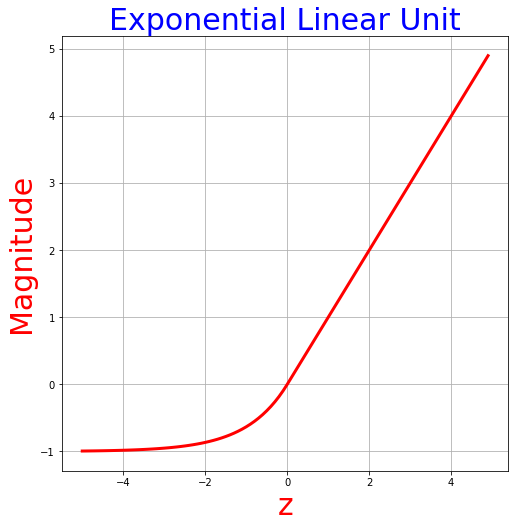

In [5]:
x = tf.range(-5, 5, delta=0.1, dtype=tf.float32)
a = tf.nn.elu(x)
plt.figure(figsize=(8,8))
plt.plot(x, a, linewidth = 3, color = 'red')
plt.title('Exponential Linear Unit',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')

***
### How to use Exponential Linear Unit with TensorFlow 2

To use the ELU, 

```
from tensorflow.keras.layers import Dense, ELU
elu = ELU()
Dense(10, activation=elu)
```


## Scaled Exponential Linear Unit (SELU)

Exponential Linear Unit (SELU) activation function is another variation of ReLU proposed by Günter Klambauer in 2017. The authors showed that if you build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU activation function, then the network will self-normalize (the output of each layer will tend to preserve mean $0$ and standard deviation $1$ during training, which resolves the vanishing/exploding gradients problem). This activation function often outperforms other activation functions very significantly.

SELU is defined as:

\begin{equation}
SELU(x) = 
\begin{cases}
\alpha \times scale \times \left(e^x-1\right) & if & x\leq 0 \\
scale * x & if&  x>0
\end{cases}
\end{equation}

where $\alpha$ and $scale$ pre-defined constants $(α=1.67326324 \  \text{and}  \ scale=1.05070098)$.


The plot of the function and its derivatioin are shown below.

![SELU](image16.png)

***

**Problems with SELU**

The main problem with SELU is that there are a few conditions for SELU to work:

1. SELU works only for a neural network composed exclusively of a stack of dense layers. It might not work for convolutional neural networks.
2. Every hidden layer’s weights must also be initialized using LeCun normal initialization.
3. Input features must be standardized with mean 0 and standard deviation.

***

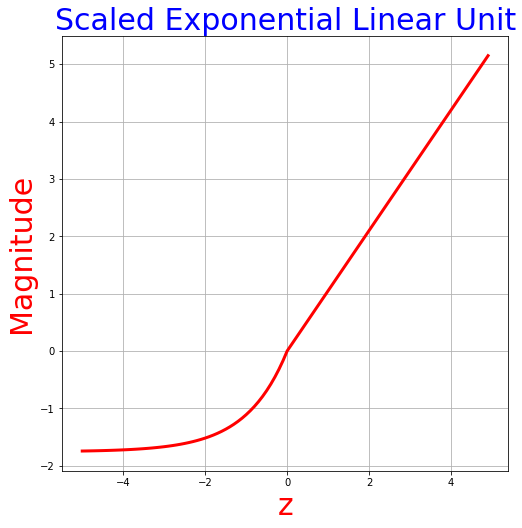

In [6]:
x = tf.range(-5, 5, delta=0.1, dtype=tf.float32)
a = tf.nn.selu(x)
plt.figure(figsize=(8,8))
plt.plot(x, a, linewidth = 3, color = 'red')
plt.title('Scaled Exponential Linear Unit',fontsize = 30, color = 'blue')
plt.xlabel('z' ,fontsize = 30, color = 'red')
plt.ylabel('Magnitude',fontsize = 30, color = 'red')
plt.grid(b=None, which='both', axis='both')

***
### How to use Scaled Exponential Linear Unit with TensorFlow 2

To use the SELU, 

```
from tensorflow.keras.layers import Dense
Dense(10, activation='selu', kernel_initializer='lecun_normal')
```

# References

1. [Activation Functions in Keras](https://keras.io/api/layers/activations/)
2. [How to Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)
3. [A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)
4. [A Comprehensive Guide on Activation Functions](https://towardsdatascience.com/a-comprehensive-guide-on-activation-functions-b45ed37a4fa5)
5. [Seven Popular Activation Functions](https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6)